# 糖尿病患者就醫型態分析報告

## 研究目的
分析糖尿病患者的基本特徵及就醫行為模式，以供醫療資源配置參考。

## 研究方法
1. 資料來源：隨機模擬資料集之糖尿病患者
2. 分析項目：
   - 病患基本特徵（年齡、性別分布）
   - 血糖控制情況

## 分析結果
病患特徵分析
   - 年齡分布
   - 性別比例

已生成範例資料並儲存為 diabetes_patients.csv

資料預覽：
   病患ID 性別  年齡  診斷年份         血糖值        BMI
0     1  男  67  2021  118.582150  29.758050
1     2  女  61  2023  149.649448  21.286554
2     3  男  58  2020  135.530744  31.399100
3     4  男  56  2023  154.280010  19.143737
4     5  男  45  2023  149.464752  24.544645

基本統計資訊：

年齡統計：
count    100.000000
mean      59.160000
std        9.413852
min       33.000000
25%       53.750000
50%       59.000000
75%       65.000000
max       84.000000
Name: 年齡, dtype: float64

性別分布：
性別
女    56
男    44
Name: count, dtype: int64

血糖值統計：
count    100.000000
mean     140.011154
std       21.048127
min       75.174653
25%      125.618611
50%      141.340821
75%      153.081522
max      217.054630
Name: 血糖值, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


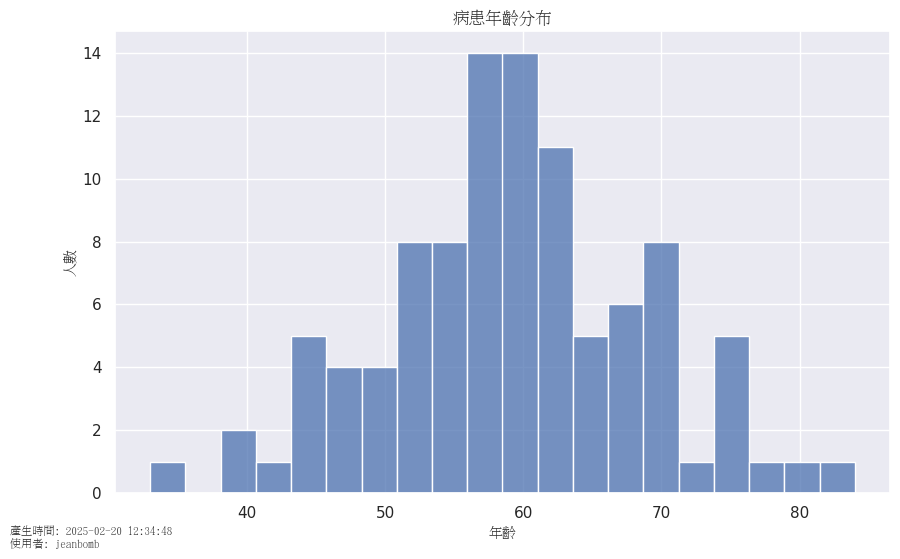

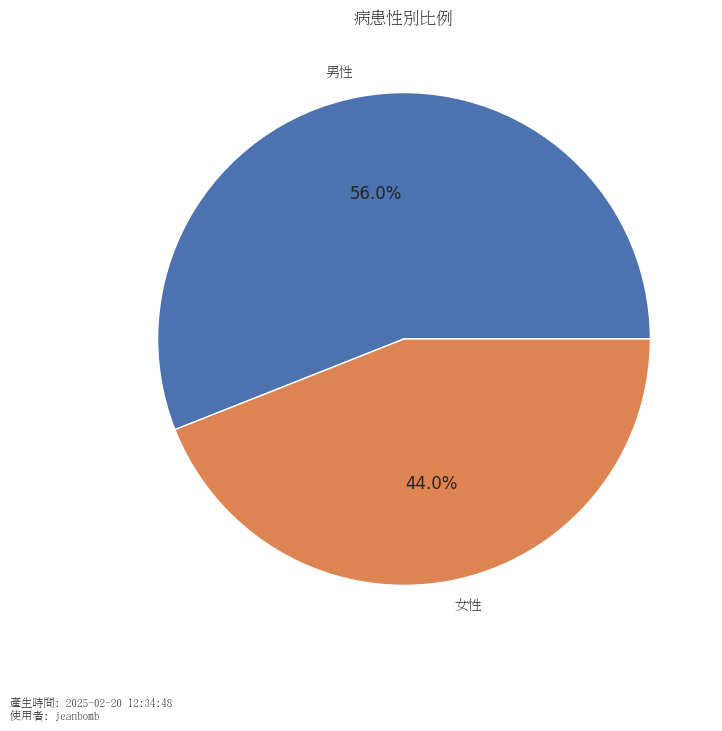

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


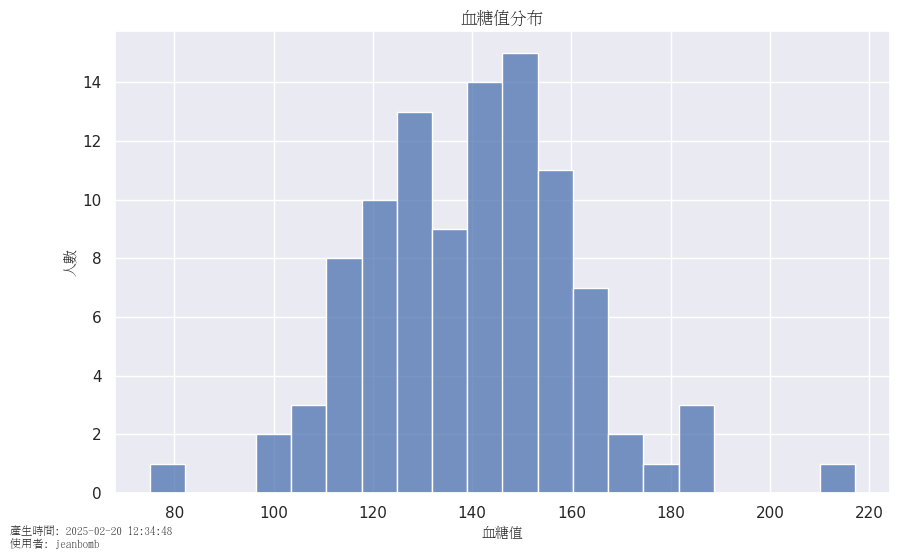

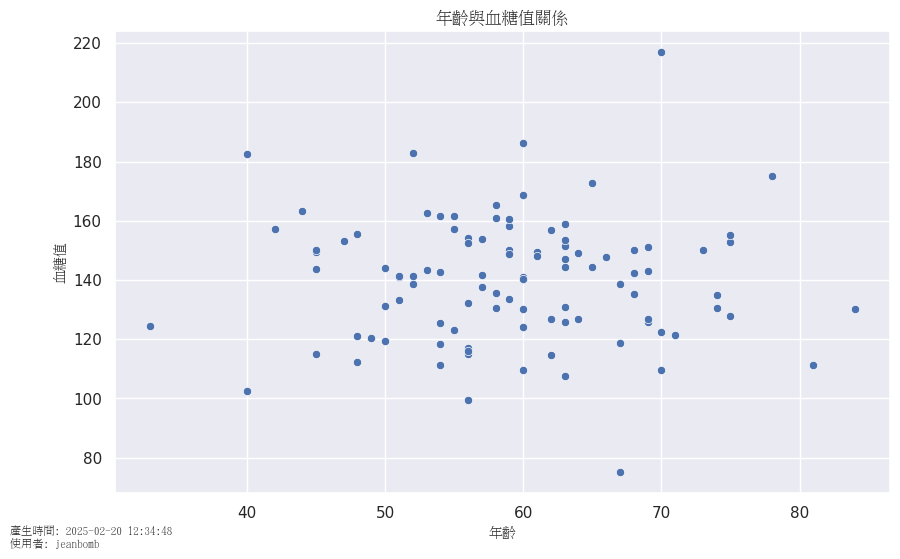

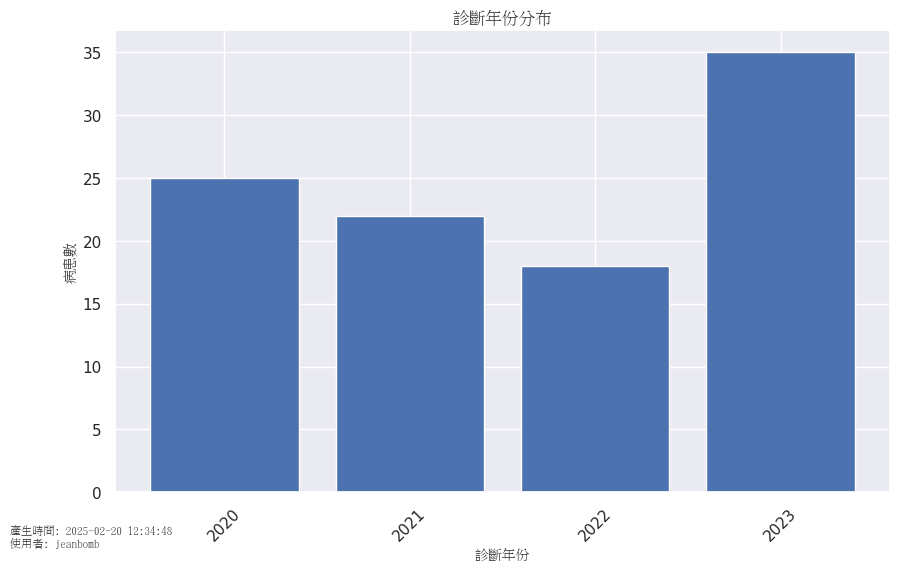


分析完成！
產生時間: 2025-02-20 12:34:48
使用者: jeanbomb


In [1]:
# 安裝必要的套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from datetime import datetime

# 設定目前時間和使用者
CURRENT_TIME = "2025-02-20 12:34:48"
CURRENT_USER = "jeanbomb"

# 設定中文字型
font_path = '/kaggle/input/fontchinese/Open_Data/Fonts/TW-Sung-98_1.ttf'
custom_font = fm.FontProperties(fname=font_path)

# 設定全域字型和圖表樣式
plt.rcParams['axes.unicode_minus'] = False
sns.set_theme()

def generate_sample_data(n_patients=100):
    """生成模擬的糖尿病患者資料"""
    np.random.seed(42)
    
    data = {
        '病患ID': range(1, n_patients + 1),
        '性別': np.random.choice(['男', '女'], n_patients),
        '年齡': np.random.normal(60, 10, n_patients).astype(int),
        '診斷年份': np.random.randint(2020, 2024, n_patients),
        '血糖值': np.random.normal(140, 20, n_patients),
        'BMI': np.random.normal(25, 3, n_patients)
    }
    
    df = pd.DataFrame(data)
    
    # 確保數值在合理範圍
    df.loc[df['年齡'] < 20, '年齡'] = 20
    df.loc[df['年齡'] > 90, '年齡'] = 90
    df.loc[df['血糖值'] < 70, '血糖值'] = 70
    df.loc[df['BMI'] < 15, 'BMI'] = 15
    df.loc[df['BMI'] > 40, 'BMI'] = 40
    
    df.to_csv('diabetes_patients.csv', index=False)
    print("已生成範例資料並儲存為 diabetes_patients.csv")
    
    return df

def add_metadata_to_plot():
    """為圖表加入時間戳記和使用者資訊"""
    plt.figtext(0.02, 0.02, 
                f"產生時間: {CURRENT_TIME}\n使用者: {CURRENT_USER}", 
                fontproperties=custom_font, 
                size=8)

# 生成模擬資料
df = generate_sample_data()

print("\n資料預覽：")
print(df.head())

print("\n基本統計資訊：")
print("\n年齡統計：")
print(df['年齡'].describe())

print("\n性別分布：")
print(df['性別'].value_counts())

print("\n血糖值統計：")
print(df['血糖值'].describe())

# 視覺化圖表
# 1. 年齡分布圖
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='年齡', bins=20)
plt.xlabel('年齡', fontproperties=custom_font, fontsize=10)
plt.ylabel('人數', fontproperties=custom_font, fontsize=10)
plt.title('病患年齡分布', fontproperties=custom_font, fontsize=12)
add_metadata_to_plot()
plt.savefig('age_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

# 2. 性別比例圖
plt.figure(figsize=(8, 8))
gender_data = df['性別'].value_counts()
patches, texts, autotexts = plt.pie(gender_data, 
                                   labels=['男性', '女性'],  # 直接指定中文標籤
                                   autopct='%1.1f%%')

# 設定中文字型
for text in texts:
    text.set_fontproperties(custom_font)
    
plt.title('病患性別比例', fontproperties=custom_font, fontsize=12)
add_metadata_to_plot()
plt.savefig('gender_ratio.png', bbox_inches='tight', dpi=300)
plt.show()

# 3. 血糖值分布圖
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='血糖值', bins=20)
plt.xlabel('血糖值', fontproperties=custom_font, fontsize=10)
plt.ylabel('人數', fontproperties=custom_font, fontsize=10)
plt.title('血糖值分布', fontproperties=custom_font, fontsize=12)
add_metadata_to_plot()
plt.savefig('glucose_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

# 4. 年齡與血糖值關係圖
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='年齡', y='血糖值')
plt.xlabel('年齡', fontproperties=custom_font, fontsize=10)
plt.ylabel('血糖值', fontproperties=custom_font, fontsize=10)
plt.title('年齡與血糖值關係', fontproperties=custom_font, fontsize=12)
add_metadata_to_plot()
plt.savefig('age_vs_glucose.png', bbox_inches='tight', dpi=300)
plt.show()

# 5. 診斷年份分布
plt.figure(figsize=(10, 6))
year_counts = df['診斷年份'].value_counts().sort_index()
plt.bar(year_counts.index.astype(str), year_counts.values)
plt.xlabel('診斷年份', fontproperties=custom_font, fontsize=10)
plt.ylabel('病患數', fontproperties=custom_font, fontsize=10)
plt.title('診斷年份分布', fontproperties=custom_font, fontsize=12)
plt.xticks(rotation=45)
add_metadata_to_plot()
plt.savefig('diagnosis_trend.png', bbox_inches='tight', dpi=300)
plt.show()

print(f"\n分析完成！")
print(f"產生時間: {CURRENT_TIME}")
print(f"使用者: {CURRENT_USER}")